# Data Description
> It is a dataset of 60,000 small rectangular 28x28 pixel grayscale pictures of
items from ten different categories of apparel, including shoes, t-shirts, dresses, and more. The following table shows the mapping of all 0-9 numbers to class labels.

0.   T-shirt/top
1.   Trouser
2.   Pullover
3.   Dress
4.   Coat
5.   Sandal
6.   Shirt
7.   Sneaker
8.   Bag
9.   Ankle boot




In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Loading Dataset

In [2]:
mnist_fashion = tf.keras.datasets.fashion_mnist

(xtrain, ytrain), (xtest, ytest) = mnist_fashion.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
ytrain.shape

(60000,)

In [5]:
k = len(set(ytrain))
print('Number of classes :',k)

Number of classes : 10


# Counting the number of unique train labels

In [6]:
unique, counts = np.unique(ytrain, return_counts=True)
print("Occurrence of Train labels: ", dict(zip(unique, counts)))

Occurrence of Train labels:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


# Counting the number of unique test labels

In [7]:
unique, counts = np.unique(ytest, return_counts=True)
print("Occurrence of Test labels: ", dict(zip(unique, counts)))

Occurrence of Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [8]:
ran_images = np.random.randint(0, 60000, size=25)
ran_images

array([25522, 17571, 37910, 35171,  1430, 23366, 12600, 10633,  8528,
       57644, 42199, 55267, 25518, 53432, 30721, 14770, 13491, 53548,
       54376, 29247, 31093, 44872,  9591, 50396, 25215])

In [9]:
images = xtrain[ran_images]

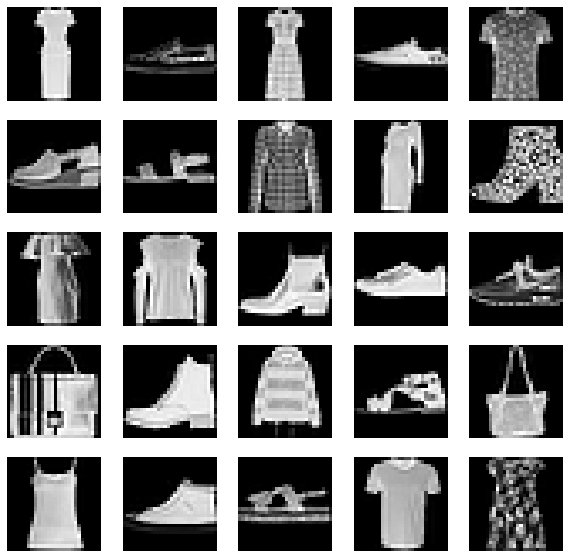

In [10]:
plt.figure(figsize=(10,10))
for i in range(len(ran_images)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()


In [11]:
ytest[:9]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)

In [12]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [13]:
xtrain[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

##Normalize data

In [14]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [15]:
xtrain[:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [16]:
xtrain[1].shape

(28, 28)

## Flatten the images into 28*28 = 784


In [17]:
xtrain = xtrain.reshape(len(xtrain), 28* 28)
xtest = xtest.reshape(len(xtest), 28*28)

In [18]:
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [19]:
model = tf.keras.Sequential()

#Hidden Layers
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

#Output Layer
model.add(Dense(k))  # k = classes of dataset
model.add(Activation('softmax'))  # softmax returns a probabilistic value 0: 10%, 1: 20%.......9:40%
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

# Loss function, Adam Optimizer

In [20]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the network
r = model.fit(xtrain,
              ytrain,
              validation_data=(xtest, ytest), # for evaluating
              epochs=20,
              batch_size=64)

Epoch 1/20
938/938 [==============================] - 4s 3ms/step - loss: 0.5528 - accuracy: 0.8034 - val_loss: 0.4318 - val_accuracy: 0.8450
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3919 - accuracy: 0.8589 - val_loss: 0.4042 - val_accuracy: 0.8548
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3586 - accuracy: 0.8687 - val_loss: 0.3766 - val_accuracy: 0.8637
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.3385 - accuracy: 0.8762 - val_loss: 0.3885 - val_accuracy: 0.8646
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3187 - accuracy: 0.8811 - val_loss: 0.3527 - val_accuracy: 0.8703
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3076 - accuracy: 0.8862 - val_loss: 0.3944 - val_accuracy: 0.8560
Epoch 7/20
938/938 [==============================] - 2s 3ms/step - loss: 0.2964 - accuracy: 0.8895 - val_loss: 0.3516 - val_accuracy: 0.8708
Epoch 

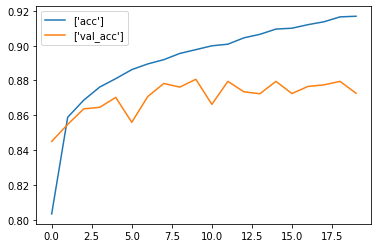

In [21]:
plt.plot(r.history['accuracy'], label=['acc'])
plt.plot(r.history['val_accuracy'], label=['val_acc']);
plt.legend();

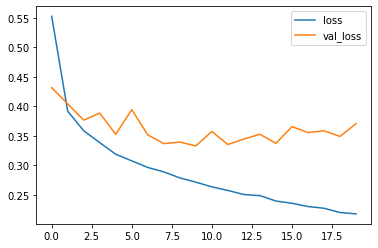

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

# Validating the model on test dataset

In [23]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(xtest,
               ytest,
               batch_size=64)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8727

Test accuracy: 87.3%
